In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

2022-11-07 21:51:34.417306: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
data = pd.read_csv('datasets/INFY.csv')
data = data.dropna()
train, test = train_test_split(data, test_size=0.1, shuffle=False)
train.shape, test.shape

((1551, 7), (173, 7))

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1724 entries, 0 to 1723
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1724 non-null   object 
 1   Open       1724 non-null   float64
 2   High       1724 non-null   float64
 3   Low        1724 non-null   float64
 4   Close      1724 non-null   float64
 5   Adj Close  1724 non-null   float64
 6   Volume     1724 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 94.4+ KB


In [5]:
trainData = train.iloc[:,4:5].values
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
length, _ = trainData.shape
length

1551

In [6]:
X_train = []
y_train = []

for i in range (60,length): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [7]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1491, 60, 1)

In [8]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [9]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
47/47 - 18s - loss: 0.0116 - 18s/epoch - 386ms/step
Epoch 2/20
47/47 - 6s - loss: 0.0022 - 6s/epoch - 134ms/step
Epoch 3/20
47/47 - 6s - loss: 0.0020 - 6s/epoch - 136ms/step
Epoch 4/20
47/47 - 6s - loss: 0.0020 - 6s/epoch - 130ms/step
Epoch 5/20
47/47 - 6s - loss: 0.0019 - 6s/epoch - 128ms/step
Epoch 6/20
47/47 - 6s - loss: 0.0020 - 6s/epoch - 130ms/step
Epoch 7/20
47/47 - 6s - loss: 0.0021 - 6s/epoch - 131ms/step
Epoch 8/20
47/47 - 6s - loss: 0.0016 - 6s/epoch - 132ms/step
Epoch 9/20
47/47 - 6s - loss: 0.0018 - 6s/epoch - 132ms/step
Epoch 10/20
47/47 - 6s - loss: 0.0014 - 6s/epoch - 130ms/step
Epoch 11/20
47/47 - 6s - loss: 0.0015 - 6s/epoch - 126ms/step
Epoch 12/20
47/47 - 6s - loss: 0.0018 - 6s/epoch - 128ms/step
Epoch 13/20
47/47 - 6s - loss: 0.0015 - 6s/epoch - 131ms/step
Epoch 14/20
47/47 - 6s - loss: 0.0013 - 6s/epoch - 132ms/step
Epoch 15/20
47/47 - 6s - loss: 0.0012 - 6s/epoch - 129ms/step
Epoch 16/20
47/47 - 6s - loss: 0.0012 - 6s/epoch - 128ms/step
Epoch 17/20
47/

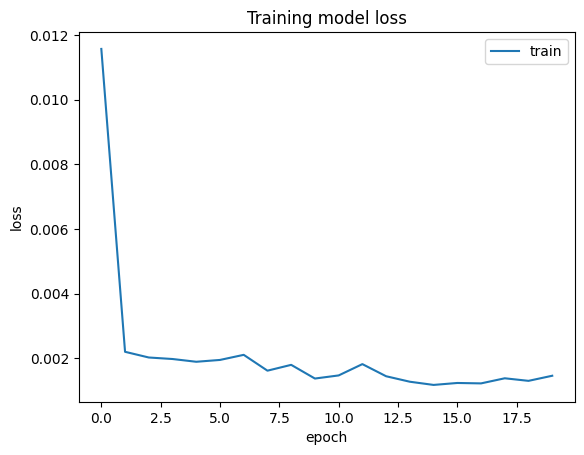

In [10]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [11]:
testData = test
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(113, 60, 1)

In [12]:
y_pred = model.predict(X_test)
y_pred.shape

4/4 [==============================] - 1s 36ms/step


(113, 1)

In [13]:
predicted_price = sc.inverse_transform(y_pred)
predicted_price

array([[19.571766],
       [19.436995],
       [19.326052],
       [19.249943],
       [19.214596],
       [19.227966],
       [19.28587 ],
       [19.377018],
       [19.485308],
       [19.59046 ],
       [19.671412],
       [19.704866],
       [19.671553],
       [19.57728 ],
       [19.441288],
       [19.273418],
       [19.087109],
       [18.918375],
       [18.786589],
       [18.701078],
       [18.666178],
       [18.67974 ],
       [18.726213],
       [18.791185],
       [18.86009 ],
       [18.929226],
       [18.993181],
       [19.053005],
       [19.11457 ],
       [19.178661],
       [19.230167],
       [19.2517  ],
       [19.233126],
       [19.170732],
       [19.076021],
       [18.97093 ],
       [18.880558],
       [18.821499],
       [18.809816],
       [18.84247 ],
       [18.90034 ],
       [18.950089],
       [18.985216],
       [19.017632],
       [19.065636],
       [19.141508],
       [19.243341],
       [19.374031],
       [19.53035 ],
       [19.70548 ],


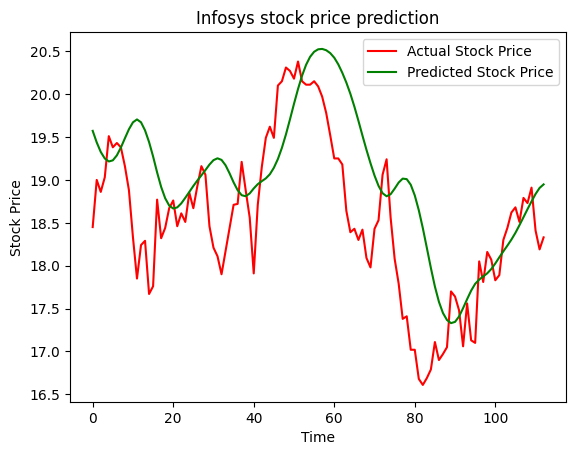

In [14]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Infosys stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [15]:
model.save('infosys_model.hdf5')

In [16]:
import tensorflow as tf
model = tf.keras.models.load_model('infosys_model.hdf5')

In [17]:
last60 = data['Close'][-60:].values
last60 = last60.reshape((1, 60, 1))
last60.shape

(1, 60, 1)

In [18]:
predicted = model.predict(last60)
predicted = sc.inverse_transform(predicted)[0, 0]
predicted

1/1 [==============================] - 1s 1s/step


43.69832

In [19]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1719,2022-10-31,18.660000,18.830000,18.610001,18.730000,18.730000,8585500
1720,2022-11-01,19.190001,19.219999,18.840000,18.910000,18.910000,5474700
1721,2022-11-02,18.709999,18.879999,18.410000,18.410000,18.410000,6370600
1722,2022-11-03,18.200001,18.270000,18.080000,18.190001,18.190001,11328700
1723,2022-11-04,18.270000,18.459999,18.100000,18.330000,18.330000,10899800
